## Modern methods of statistical learning
### Labb/project 1
#### by Hannes Kindbom and Victor Reineck


In [29]:
## Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
#Read data
df = pd.read_csv("Auto_dataset.csv")

## Part 1

In [10]:
#Modify
median_mpg = df["mpg"].median()
df["mpg"] = (df["mpg"] > median_mpg).astype(int)
#drop non-numeric data
df = df[df.horsepower.apply(lambda datapoint: datapoint.isnumeric())]
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,0,8,302.0,140,3449,10.5,70,1,ford torino
5,0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### Graphical Analysis

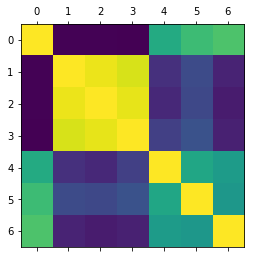

In [6]:
#correlation plot
corr_matrix = df.corr()

#postive = yellow and negative = blue
plt.matshow(corr_matrix)
plt.show()

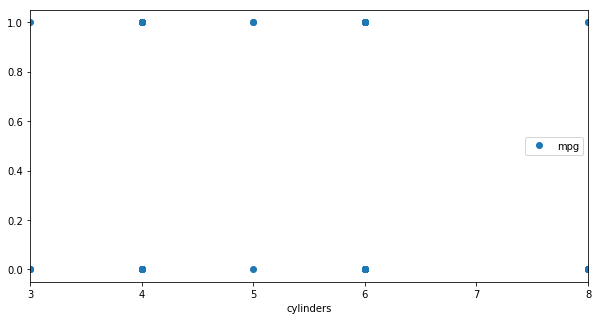

In [7]:
#scatterplots
df.plot(x="cylinders", y="mpg", style="o", figsize=(10,5))

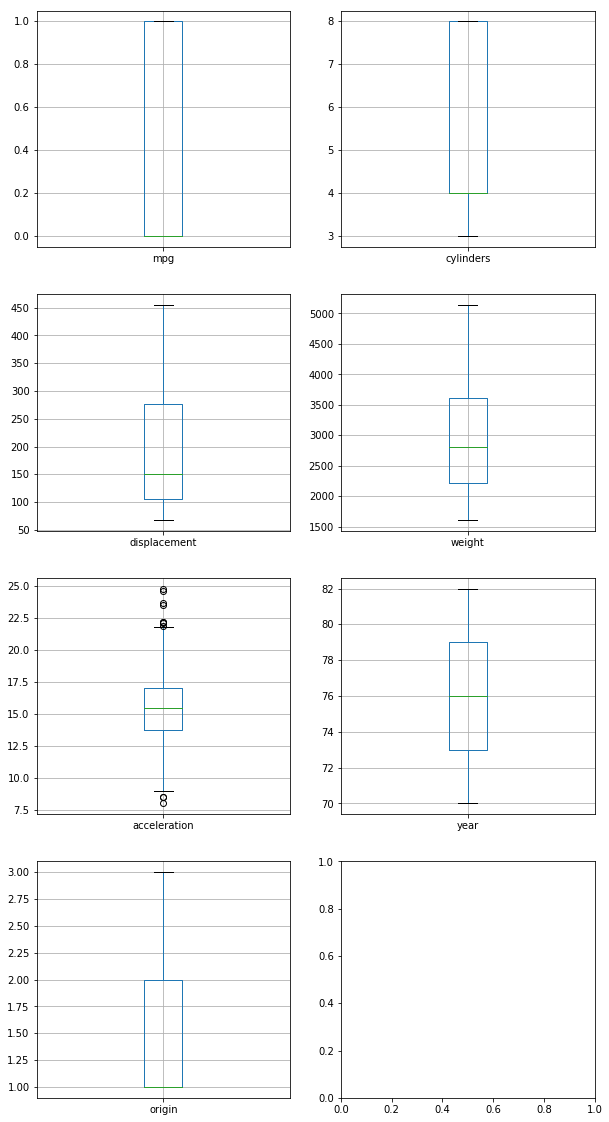

In [8]:
#Boxplot
fig, axes = plt.subplots(4,2) #create figure and axes
columns = df.columns.tolist()
fig.set_figheight(20)
fig.set_figwidth(10)

#drop names column and horsepower since not working with boxplot
columns.remove("name")
columns.remove("horsepower")

for idx, col in enumerate(columns):
    df.boxplot(column=col, ax = axes.flatten()[idx])

## Prepare dataframe for learning

In [31]:
train_df, test_df = train_test_split(df, test_size=0.2)
#column 1 to 4 are features and column 0 is response
X_train = train_df.iloc[:, 1:4].values
Y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:4].values
Y_test = test_df.iloc[:, 0].values

In [32]:
#Train LDA
LDA_clf = LinearDiscriminantAnalysis()
QDA_clf = QuadraticDiscriminantAnalysis()
KNN_clf = KNeighborsClassifier(n_neighbors=3)
LogReg_clf = LogisticRegression()

LDA_clf.fit(X_train,Y_train)
QDA_clf.fit(X_train,Y_train)
KNN_clf.fit(X_train,Y_train)
LogReg_clf.fit(X_train,Y_train)

#returns mean accuracy
print("LDA Accuracy: " , LDA_clf.score(X_test,Y_test))
print("QDA Accuracy: " , QDA_clf.score(X_test,Y_test))
print("KNN Accuracy: " , KNN_clf.score(X_test,Y_test))
print("LogReg_Accuracy: " , LogReg_clf.score(X_test,Y_test))

LDA Accuracy:  0.9493670886075949
QDA Accuracy:  0.9367088607594937
KNN Accuracy:  0.9240506329113924
LogReg_Accuracy:  0.810126582278481


/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
